# Crash course: Function Interpolation and Root Finding

## For scalar continuous functions on a bounded domain

Author: [MachinaFantasma](https://github.com/phantomachine) | [Twitter](https://twitter.com/machinafantasma)


**Key Learning Points**

Skills:

* Continuous functions on bounded domains

* Intermediate value theorem, Weierstrass' Approximation Theorem

* Python:

    * Programming loops
    * conditional statements
    * working with NumPy arrays 
    * SciPy function for root finding (``brentq``) from ``optimize`` class
    * Defining custom functions (``def``)
    * Defining custom functions on the fly (``lambda``)
    * SciPy function for linear interpolation (``interp1``) from ``interpolate`` class

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as interpolate
import scipy.optimize as opt

In [3]:
%matplotlib inline

## Function interpolation on 1D

Suppose we have a set of discrete data coordinates, $(x, f(x))$ in 2D Euclidean space.

Imagine these as samples from the graph of an unknown function $f: \mathbb{R} \mapsto \mathbb{R}$.

Imagine, you are a god who knows what the *true* $f$ is. Say, $f(x) = \cos(x), x \in [-2\pi, 2\pi]$.

In [4]:
# True function is cos(x), generate sample data
x = np.linspace(-2.0*np.pi, 2.0*np.pi, 30)
y = np.cos(x)

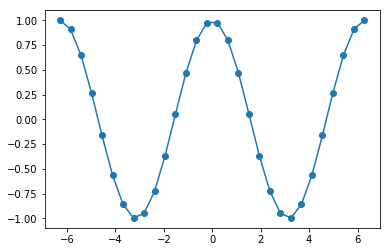

In [5]:
plt.figure()
plt.plot(x,y, 'o-')
plt.show()

As a human scientist in this world, all you see are the finite data points:

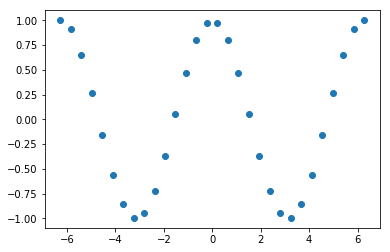

In [6]:
plt.figure()
plt.plot(x,y, 'o')
plt.show()

But you are interested in interpolating these data points to be able to say something about the value of the underlying function at arbitrary points in the domain.

* e.g., What is the *approximate* value of the unknown function if $x = 0.1456389267$?

The simplest way to interpolate is to join the data points by a linear function:

In [7]:
f_fitted = interpolate.interp1d(x,y)

The above instance had invoked ``SciPy``'s ``interpolate`` class, and utilized the module ``interp1d``, which defaults to using a linear interpolation scheme.

The way to use it here, to answer our question is to do this:

In [8]:
x0 = 0.1456389267
y0 = f_fitted(x0)
print(y0)

0.9766205557100867


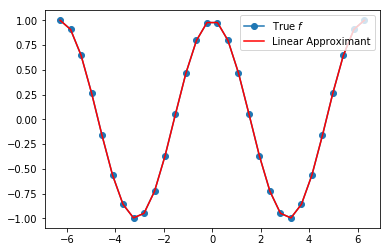

In [14]:
plt.figure()
# "True" function
plt.plot(x,y, 'o-', label="True $f$")
# Linear interpolant
plt.plot(x,f_fitted(x), '-r', label="Linear Approximant")
plt.legend()
plt.show()

**Remark**. Note that this class of linear interpolation basis functions are shape preserving. The interpolant respect the shape of the true function.

However, the interpolant here is not everywhere differentiable, unlike the true function. Why?

## Root finding

In many applications, we are interested in finding the root of a scalar continuous function $f$ at zero. 

That is, solve for $x$, such that $f(x) = 0$.

**Examples**. We will see this in T02 this week when solving for:

1. an implicit equilibrium mapping in a more general OLG model.

2. an optimizer $k_{t+1} =g_{t}(k_{t})$ that satisfies a non-analytical first order condition (Euler functional equation), for each given $k_{t}$.

In [15]:
# Domain of problem
X = np.linspace(0.0, np.pi, 30)

# Root finding of a known analytical function
f = lambda x, A: A*np.cos(x)

A = 1.0
x_root = opt.brentq(f, X.min(), X.max(), args=(A,))

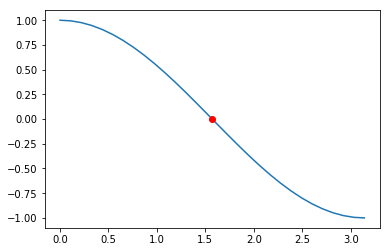

In [16]:
plt.figure()
# "True" function
plt.plot(X,f(X,A), '-')
# Solution for root
plt.plot(x_root,f(x_root,A), 'or')
plt.show()

## Root finding of an interpolated function

Suppose now $f$ is unknown, and we have to interpolate it from finite data.

Let's reuse the ``f_fitted`` object we created in the earlier example.

We are interested in the local root of an interpolant $\hat{f}$ that approximated the "unknown" $f$, within the domain $X = [0, \pi]$.

In [12]:
x_zero = opt.brentq(f_fitted, X.min(), X.max())

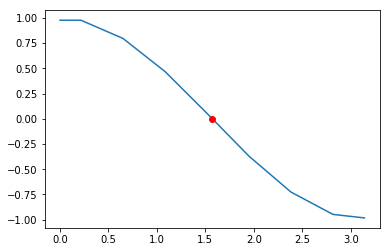

In [13]:
plt.figure()
# "True" function
plt.plot(X,f_fitted(X), '-')
# Solution for root
plt.plot(x_zero,f_fitted(x_zero), 'or')
plt.show()